In [68]:
import pandas as pd
import numpy as np 
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings            
warnings.filterwarnings("ignore")



#Ml
import lazypredict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


For the Machine Learning Aspect of this Project we were tasked with the following:
    
    - Describe the rationale and justification for the choice of machine learning models
    - Sentiment Analysis
    - You should train and test for Supervised Learning and other appropriate metrics for unsupervised/ semi-supervised machine learning models that you have chosen
    - A Table or graphics should be provided to illustrate the similarities and contrast of the Machine Learning modelling outcomes based on the scoring metric used for the analysis of the above-mentioned scenario. 
    

In [2]:
#Firstly lets import the datasets dervied from the EDA perfromed earlier.
df_ireland = pd.read_csv ('../datasets/final_df_ireland.csv')
df_germany = pd.read_csv ('../datasets/final_df_germany.csv')
df_spain = pd.read_csv ('../datasets/final_df_spain.csv')
df_ireland.describe()

,Year,MilkPrice (Per 100 KG €),DairyCowPopulation,BovinePopulation,BovineMeatWeight(Tonnes)
count,12.000000,12.000000,1.200000e+01,1.200000e+01,12.000000
mean,2015.500000,33.054167,1.245632e+06,6.390792e+06,578357.500000
std,3.605551,3.754460,1.777104e+05,2.652778e+05,43397.769764
min,2010.000000,27.250000,1.006900e+06,5.917700e+06,495400.000000
25%,2012.750000,30.282500,1.076910e+06,6.250692e+06,555940.000000
50%,2015.500000,33.290000,1.267560e+06,6.475835e+06,585085.000000
75%,2018.250000,36.337500,1.383265e+06,6.598475e+06,617715.000000
max,2021.000000,38.310000,1.505270e+06,6.673590e+06,633380.000000


Text(68.99999999999999, 0.5, 'Columns')

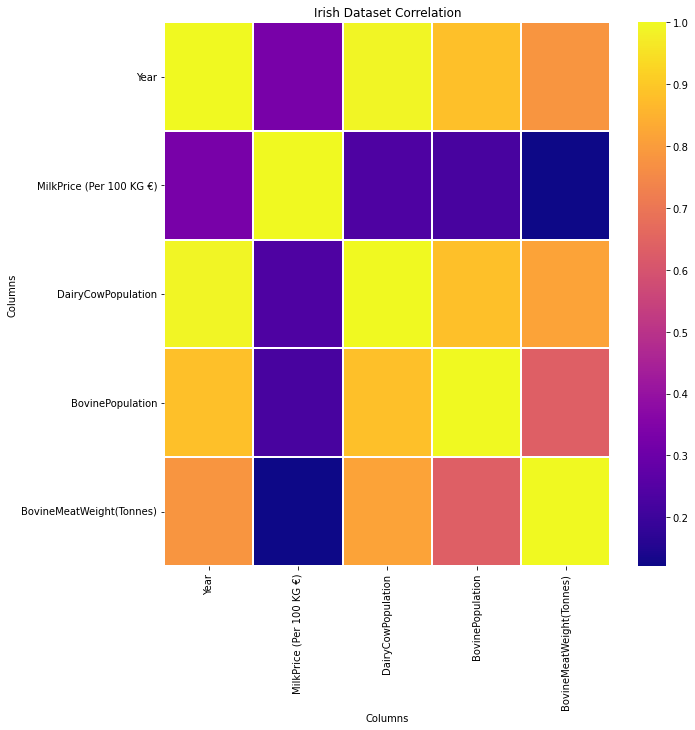

In [151]:
corrmat = df_ireland.corr()
f, ax = plt.subplots(figsize =(10, 10))
sns.heatmap(corrmat, ax = ax, cmap ="plasma", linewidths = 0.1).set(title='Irish Dataset Correlation')
plt.xlabel("Columns")
plt.ylabel("Columns")

Text(68.99999999999999, 0.5, 'Columns')

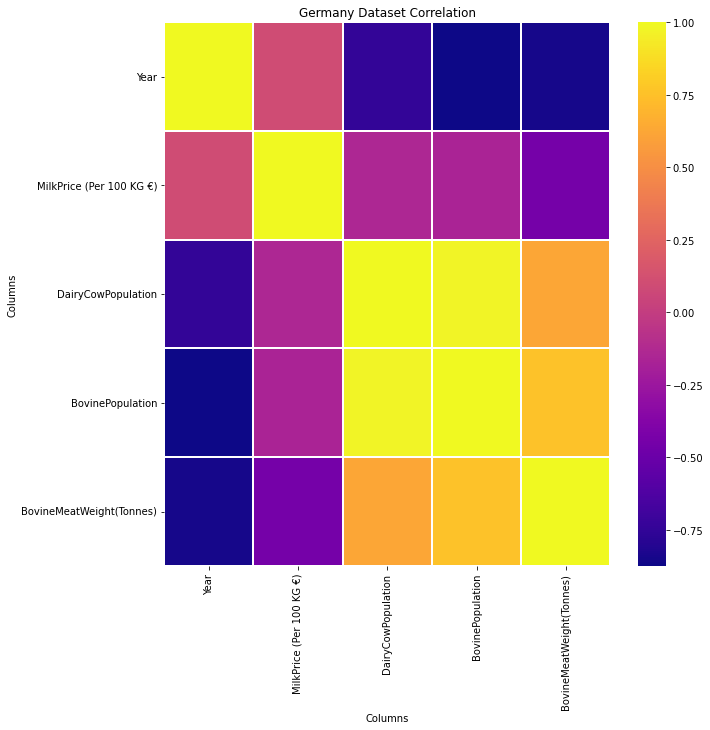

In [150]:
corrmat = df_germany.corr()
f, ax = plt.subplots(figsize =(10, 10));
sns.heatmap(corrmat, ax = ax, cmap ="plasma", linewidths = 0.1).set(title='Germany Dataset Correlation')
plt.xlabel("Columns")
plt.ylabel("Columns")

In [ ]:
corrmat = df_spain.corr()
f, ax = plt.subplots(figsize =(10, 10));
sns.heatmap(corrmat, ax = ax, cmap ="plasma", linewidths = 0.1).set(title='Germany Dataset Correlation')
plt.xlabel("Columns")
plt.ylabel("Columns")

To check for classification, I imported the lazypredict library. This gives a better undertsanding of which algorithims perform best on the data

In [24]:
df_ireland.groupby('Year')['MilkPrice (Per 100 KG €)'].mean()

Year
2010   28.15
2011   33.55
2012   30.83
2013   37.76
2014   36.42
2015   28.64
2016   27.25
2017   36.31
2018   33.87
2019   32.53
2020   33.03
2021   38.31
Name: MilkPrice (Per 100 KG €), dtype: float64

In [44]:
#Creating 2 new columns, 1 for increase in Price of milk, 1 for increase in weight of sold Bovine Meat
# Calcualted the mean for both columns, and created a new column with values 1, if above mean and 0 if below.
df_ireland["MilkIncrease"] = np.where(df_ireland["MilkPrice (Per 100 KG €)"]>33.054167, "1", "0")
df_ireland["WeightIncrease"] = np.where(df_ireland["BovineMeatWeight(Tonnes)"]>578357.500000, "1", "0")



In [45]:
df_ireland.head()

,CountryCode,Year,MilkPrice (Per 100 KG €),DairyCowPopulation,BovinePopulation,BovineMeatWeight(Tonnes),MilkIncrease,WeightIncrease
0,IE,2010,28.15,1006900,5917700,559000,0,0
1,IE,2011,33.55,1035640,5925320,546760,1,0
2,IE,2012,30.83,1060260,6253240,495400,0,0
3,IE,2013,37.76,1082460,6309050,517570,1,0
4,IE,2014,36.42,1127720,6243050,581810,1,1


In [46]:
from lazypredict.Supervised import LazyClassifier

x = np.array(df_ireland[["DairyCowPopulation","MilkPrice (Per 100 KG €)"]])
y = np.array(df_ireland[["MilkIncrease"]])

# train the data, and separate train from test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=49)

In [47]:
Classification_Test_Milk = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = Classification_Test_Milk.fit(xtrain, xtest, ytrain, ytest);
models

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 99.98it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.03
BaggingClassifier,1.00,1.00,1.00,1.00,0.03
SVC,1.00,1.00,1.00,1.00,0.00
SGDClassifier,1.00,1.00,1.00,1.00,0.00
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.00
RidgeClassifier,1.00,1.00,1.00,1.00,0.01
RandomForestClassifier,1.00,1.00,1.00,1.00,0.07
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.00
Perceptron,1.00,1.00,1.00,1.00,0.00


In [48]:
x = np.array(df_ireland[["BovinePopulation","BovineMeatWeight(Tonnes)"]])
y = np.array(df_ireland[["WeightIncrease"]])

# train the data, and separate train from test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=49)

In [49]:
Classification_Test_MeatTonnes = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = Classification_Test_MeatTonnes.fit(xtrain, xtest, ytrain, ytest);
models

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 106.88it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.01
BaggingClassifier,1.00,1.00,None,1.00,0.03
SVC,1.00,1.00,None,1.00,0.00
SGDClassifier,1.00,1.00,None,1.00,0.00
RidgeClassifierCV,1.00,1.00,None,1.00,0.00
RidgeClassifier,1.00,1.00,None,1.00,0.00
RandomForestClassifier,1.00,1.00,None,1.00,0.07
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.00
Perceptron,1.00,1.00,None,1.00,0.00


From both outputs from LazyClassifier, most ML Models have a score accuarcy of 100% which is what we are looking for.

Lets prep the data for the following three ML Models:

    - GaussianNB
    
    - LogisticRegression
    
    - RandomForestClassifier

In [129]:
x = df_ireland[['DairyCowPopulation','MilkPrice (Per 100 KG €)']]
y = df_ireland['Year']
y = np.array(y).reshape(-1,1)

In [130]:
x.shape , y.shape

((12, 2), (12, 1))

In [131]:
# Here I create 4 arrays, these are used to store our scores from  the Random Forrest model

rf_predictions = []
rf_test_accurancy = []
rf_train_accuracy = []
rf_cv = []

In [140]:
def myRFModel(size, cv_,):
    
    # basic train test split simialr to LR, np.ravel returns an array of the same shape
    x_train, x_test, y_train, y_test =  train_test_split(x, np.ravel(y), test_size = size/100, random_state = 68)
    # here I am fitting the model
    randomforest = RandomForestRegressor(criterion = 'mse', random_state=0).fit(x_train, y_train)
    
    pred = randomforest.predict(x_test)
    rf_predictions.append(pred)

    test_accurancy = randomforest.score(x_test, y_test)
    rf_test_accurancy.append(test_accurancy)
    
    train_accuracy = randomforest.score(x_train, y_train)
    rf_train_accuracy.append(train_accuracy)
    
    cross_validation = cross_val_score(randomforest, x_test, y_test, cv=2).mean()
    rf_cv .append(cross_validation)
    
    # Now lets print the results to check our scores/accuracy
    print("This test was carried out using   {}%  test size ".format(size))
    print("Test Result  : {:.3f}".format(test_accurancy))
    print("Train Result : {:.3f}".format(train_accuracy))
    print("CV Result    : {:.3f}\n".format(cross_validation))

    # Using plot to compare prediction and test results
    plt.figure(figsize=(10,5))
    plt.title('Dairy/Milk Random Forrest Regression - Ireland',fontsize = 20, color = 'b')
    plt.plot(pred, linestyle = 'dotted', linewidth = 5, label='RF Test Size =  {}%'.format(size),color='black')
    plt.plot(y_test, linewidth = 3, label = 'Testing Sample',color='lime')
    plt.legend(loc = 'upper center', fontsize = 12);    
    

This test was carried out using   10%  test size 
Test Result  : 0.879
Train Result : 0.978
CV Result    : nan

This test was carried out using   20%  test size 
Test Result  : 0.873
Train Result : 0.981
CV Result    : nan

This test was carried out using   30%  test size 
Test Result  : 0.825
Train Result : 0.980
CV Result    : -0.014



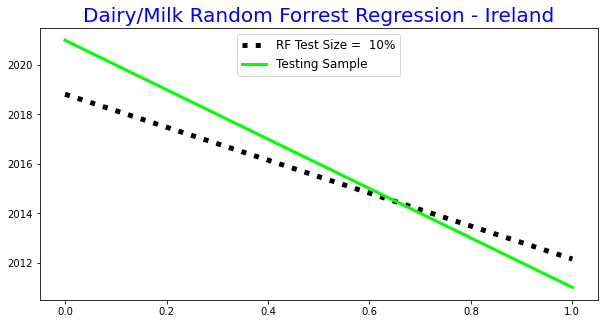

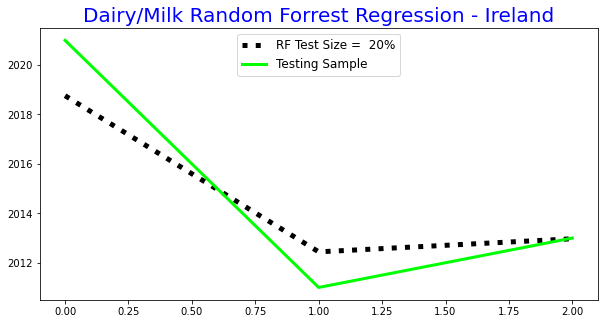

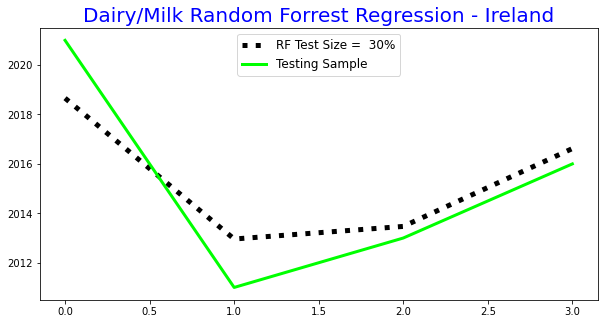

In [141]:

myRFModel(10, 3)# using 10% of the test
myRFModel(20, 3)# using 20% of the test
myRFModel(30, 3)# using 30% of the test

In [137]:
# Here I create 4 arrays, these are used to store our scores from  the LR model
lr_predictions = []
lr_test_accurancy = []
lr_train_accuracy = []
lr_cross_validation = []

In [138]:
def myLRModel(size, _cv):
   
    # simple test/train split for the purpose of LR, picked random number for random state
    x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = size/100, random_state = 13345)
    # fit model
    linearRegressor = LinearRegression().fit(x_train, y_train)
    # X test works as my linear regression predictor
    pred = linearRegressor.predict(x_test)
    lr_predictions.append(pred)
    # generate testing computation using x_test and y_test which we created above
    test_accurancy = linearRegressor.score(x_test, y_test)
    lr_test_accurancy.append(test_accurancy)  
    # generate testing computation using x_train and y_train
    train_accurancy = linearRegressor.score(x_train, y_train)
    lr_train_accuracy.append(train_accurancy)
    # Using CV/ Cross Validation, cv will be 3 for purpose of test
    cross_validation = cross_val_score(linearRegressor, x_test, y_test, cv=2).mean()
    lr_cross_validation.append(cross_validation)

    # Now lets print the results to check our scores/accuracy
    print("This test was carried out using   {}%  test size ".format(size))
    print("Test Result  : {:.3f}".format(test_accurancy))
    print("Train Result : {:.3f}".format(train_accurancy))
    print("CV Result    : {}\n".format(cross_validation))

    
    # Using plot to compare prediction and test results
    plt.figure(figsize=(10,5))
    plt.title('Dairy/Milk Linear Regression - Ireland',fontsize = 20, color = 'b')
    plt.plot(pred, linestyle = 'dotted', linewidth = 5, label='LR  Test Size =  {}%'.format(size),color='black')
    plt.plot(y_test, linewidth = 3, label = 'Testing Sample',color='lime')
    plt.legend(loc = 'upper center', fontsize = 12);   

This test was carried out using   10%  test size 
Test Result  : 0.605
Train Result : 0.993
CV Result    : nan

This test was carried out using   20%  test size 
Test Result  : 0.970
Train Result : 0.992
CV Result    : nan

This test was carried out using   30%  test size 
Test Result  : 0.976
Train Result : 0.992
CV Result    : -23.76947763494244



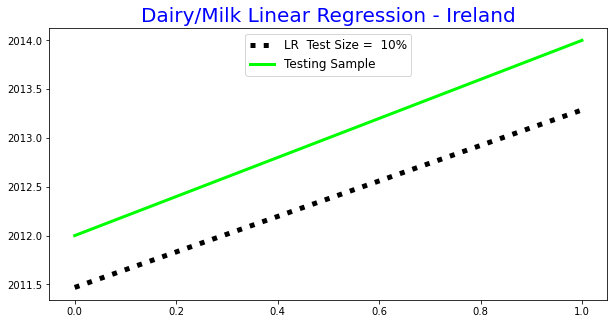

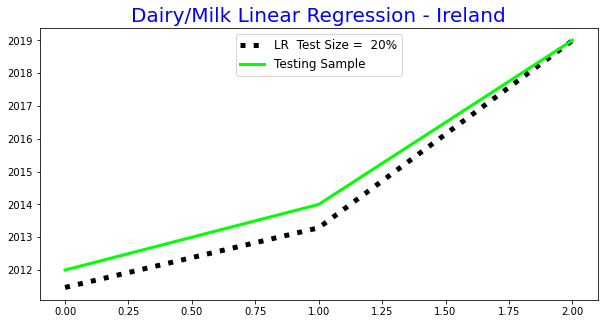

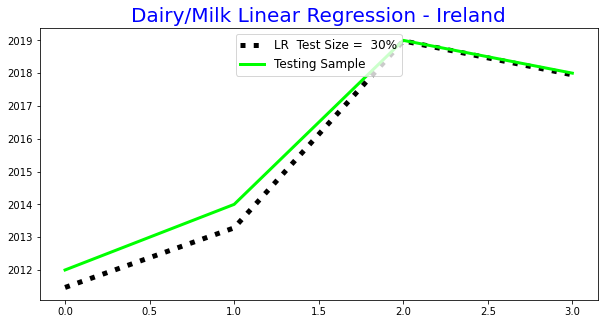

In [139]:
myLRModel(10, 3)# using 10% of the test
myLRModel(20, 3)# using 20% of the test
myLRModel(30, 3)# using 30% of the test


# Sentiment Analysis